In [2]:
from mpl_toolkits.basemap import Basemap
import pandas as pd
import numpy as np

%matplotlib inline

airports = pd.read_csv("airports.csv")
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
airports.head()

,id,name,city,country,code,icao,latitude,longitude,altitude,offset,dst,timezone
0,1,Goroka,Goroka,Papua New Guinea,GKA,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
1,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
2,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby
3,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby
4,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby


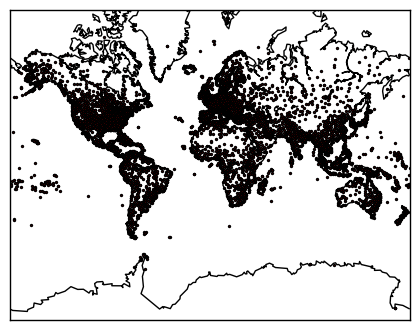

In [3]:
x, y = m(airports["longitude"].tolist(), airports["latitude"].tolist())
m.scatter(x, y, s=2, c="red")
m.drawcoastlines()

In [4]:
# yritetään rekonstruktoida dataquestion geo_routes.csv
routes = pd.read_csv("routes.csv")
routes.head()


,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [17]:
pd.options.mode.chained_assignment = None

airport_coords = airports[["code", "longitude", "latitude"]]
geo_routes = routes[["airline", "source", "dest", "equipment"]]
geo_routes = geo_routes.join(airport_coords.set_index("code"), on="source")
geo_routes.rename(columns={"longitude": "start_lon", "latitude": "start_lat"}, inplace=True)
geo_routes = geo_routes.join(airport_coords.set_index("code"), on="dest")
geo_routes.rename(columns={"longitude": "end_lon", "latitude": "end_lat"}, inplace=True)
# geo_routes.loc[:,"start_lon"] = np.nan
# geo_routes.loc[:,"end_lon"] = np.nan
# geo_routes.loc[:,"start_lat"] = np.nan
#geo_routes.loc[:,"end_lat"] = np.nan
geo_routes.head()
           # "end_lon", "start_lan", "end_lat"]] = 0

,airline,source,dest,equipment,start_lon,start_lat,end_lon,end_lat
0,2B,AER,KZN,CR2,39.956589,43.449928,49.278728,55.606186
1,2B,ASF,KZN,CR2,48.006278,46.283333,49.278728,55.606186
2,2B,ASF,MRV,CR2,48.006278,46.283333,43.081889,44.225072
3,2B,CEK,KZN,CR2,61.503333,55.305836,49.278728,55.606186
4,2B,CEK,OVB,CR2,61.503333,55.305836,82.650656,55.012622


In [18]:
geo_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 8 columns):
airline      67663 non-null object
source       67663 non-null object
dest         67663 non-null object
equipment    67645 non-null object
start_lon    67428 non-null float64
start_lat    67428 non-null float64
end_lon      67425 non-null float64
end_lat      67425 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB
